In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import cross_validate, learning_curve, train_test_split
from sklearn.linear_model import LinearRegression


df = pd.read_excel('JamaicaCommercialDataGrid.xlsx')
df

,Period,Inventory Bldgs,Inventory SF,Vacant SF Direct,Vacant SF Sublet,Vacant SF Total,Vacant Percent % Direct,Vacant Percent % Sublet,Vacant Percent % Total,Total Available SF Direct,...,Office Gross Rent Overall,All Service Type Rent Direct,All Service Type Rent Sublet,All Service Type Rent Overall,Non-Office NNN Rent Direct,Non-Office NNN Rent Sublet,Non-Office NNN Rent Overall,Office Base Rent Direct,Office Base Rent Sublet,Office Base Rent Overall
0,2025 Q3 QTD,194,6200715,1834580,56121,1890701,0.296,0.009,0.305,2047618,...,39.73,32.73,25.25,32.7,32.23,-,32.23,35.74,25.25,35.61
1,2025 Q2,193,6200715,1792052,56121,1848173,0.289,0.009,0.298,2033590,...,39.73,33.31,25.25,33.28,33.63,-,33.63,35.69,25.25,35.56
2,2025 Q1,193,6200715,1752706,44403,1797109,0.283,0.007,0.29,1965926,...,39.34,33.14,25.25,33.11,33.09,-,33.09,36.78,25.25,36.56
3,2024 Q4,193,6200715,1588157,41153,1629310,0.256,0.007,0.263,1632619,...,19.3,33.65,25.25,33.61,32.37,-,32.37,35.23,25.25,34.97
4,2024 Q3,192,6200715,1390097,41153,1431250,0.224,0.007,0.231,1816255,...,21.41,37.11,25.25,37.04,33.68,-,33.68,35.59,25.25,35.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,1997 Q1,164,5112498,44198,0,44198,0.009,0,0.009,-,...,16.65,7.31,-,7.31,-,-,-,15,-,15
115,1996 Q4,164,5112498,45841,0,45841,0.009,0,0.009,-,...,14.65,7.39,-,7.39,-,-,-,13,-,13
116,1996 Q3,164,5112498,41750,0,41750,0.008,0,0.008,-,...,14.65,8.95,-,8.95,-,-,-,13,-,13
117,1996 Q2,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [19]:
df = df.replace('-', np.nan)
df.head()


/var/folders/gj/84cwp0nn3tv2_r__6jbrp5hc0000gn/T/ipykernel_75396/4133141176.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('-', np.nan)


,Period,Inventory Bldgs,Inventory SF,Vacant SF Direct,Vacant SF Sublet,Vacant SF Total,Vacant Percent % Direct,Vacant Percent % Sublet,Vacant Percent % Total,Total Available SF Direct,...,Office Gross Rent Overall,All Service Type Rent Direct,All Service Type Rent Sublet,All Service Type Rent Overall,Non-Office NNN Rent Direct,Non-Office NNN Rent Sublet,Non-Office NNN Rent Overall,Office Base Rent Direct,Office Base Rent Sublet,Office Base Rent Overall
0,2025 Q3 QTD,194.0,6200715.0,1834580.0,56121.0,1890701.0,0.296,0.009,0.305,2047618.0,...,39.73,32.73,25.25,32.70,32.23,NaN,32.23,35.74,25.25,35.61
1,2025 Q2,193.0,6200715.0,1792052.0,56121.0,1848173.0,0.289,0.009,0.298,2033590.0,...,39.73,33.31,25.25,33.28,33.63,NaN,33.63,35.69,25.25,35.56
2,2025 Q1,193.0,6200715.0,1752706.0,44403.0,1797109.0,0.283,0.007,0.290,1965926.0,...,39.34,33.14,25.25,33.11,33.09,NaN,33.09,36.78,25.25,36.56
3,2024 Q4,193.0,6200715.0,1588157.0,41153.0,1629310.0,0.256,0.007,0.263,1632619.0,...,19.30,33.65,25.25,33.61,32.37,NaN,32.37,35.23,25.25,34.97
4,2024 Q3,192.0,6200715.0,1390097.0,41153.0,1431250.0,0.224,0.007,0.231,1816255.0,...,21.41,37.11,25.25,37.04,33.68,NaN,33.68,35.59,25.25,35.32


In [ ]:
import numpy_financial as nf

cf = [-10_000_000, 1_000_000, 1_050_000, 1_102_500, 1_157_625, 1_157_625 + 1_157_625/0.05]
hurdle = 0.08

npv = nf.npv(hurdle, cf)
irr = nf.irr(cf)

print(f"NPV @ {hurdle:.1%} = ${npv:,.0f}")
print(f"IRR = {irr:.1%}")


NPV @ 8.0% = $10,097,283
IRR = 26.3%


In [22]:
import numpy as np

base_cost = 10e6
for pct in [0.9, 1.0, 1.1]:
    cf[0] = -base_cost * pct
    print(pct, "cost → IRR:", nf.irr(cf))


0.9 cost → IRR: 0.2947442661227544
1.0 cost → IRR: 0.26348082959402896
1.1 cost → IRR: 0.23609488590513106


In [23]:
# ─────────────────────────────────────────────────────────────────────────────
# CREATE JAMAICA PARCELS GEOJSON FROM EXISTING ZONE DATA
# ─────────────────────────────────────────────────────────────────────────────

import geopandas as gpd
import folium
import pandas as pd
import numpy as np
from shapely.geometry import Polygon

print("🏗️ CREATING JAMAICA PARCELS GEOJSON FROM ZONE DATA")
print("="*60)

# Check if jamaica_parcels.geojson already exists
import os
if os.path.exists("jamaica_parcels.geojson"):
    print("✅ Found existing jamaica_parcels.geojson")
    parcels = gpd.read_file("jamaica_parcels.geojson")
else:
    print("🔧 Creating jamaica_parcels.geojson from zone data...")
    
    # Try to load existing zone data
    zone_file = None
    for filename in ["jamaica_zones_v1.kml", "jamaica_zones.kml", "Section_ZoningMapIndex_20250718.geojson"]:
        if os.path.exists(filename):
            zone_file = filename
            break
    
    if zone_file:
        print(f"📂 Loading zone data from: {zone_file}")
        try:
            if zone_file.endswith('.geojson'):
                zones = gpd.read_file(zone_file)
            else:  # KML file
                zones = gpd.read_file(zone_file)
        except Exception as e:
            print(f"⚠️ Error loading {zone_file}: {e}")
            zones = None
    else:
        zones = None
    
    # If no zone file found, create synthetic data based on FAR analysis
    if zones is None:
        print("🔧 Creating synthetic parcels data...")
        
        # Jamaica neighborhood center
        jamaica_center = [-73.7960, 40.6995]
        np.random.seed(42)
        
        # Zone data with FAR values from your comprehensive analysis
        zone_data = {
            'C4-3A': {'before': 3.0, 'after': 3.4},
            'C4-4D': {'before': 3.0, 'after': 3.4},
            'C4-4A': {'before': 4.0, 'after': 3.4},
            'C4-5X': {'before': 4.0, 'after': 3.4},
            'C6-2': {'before': 6.0, 'after': 6.0},
            'C6-3': {'before': 8.0, 'after': 8.0},
            'C6-3A': {'before': 4.0, 'after': 7.5},
            'C6-3X': {'before': 4.0, 'after': 6.0},
            'C6-4': {'before': 8.0, 'after': 12.0},
            'R3-2': {'before': 0.75, 'after': 3.0},
            'R4-1': {'before': 0.75, 'after': 3.0},
            'R5': {'before': 1.25, 'after': 3.9},
            'R5D': {'before': 1.25, 'after': 4.0},
            'R6': {'before': 1.61, 'after': 6.0},
            'R6A': {'before': 3.0, 'after': 5.01},
            'R6B': {'before': 2.0, 'after': 2.0},
            'R7A': {'before': 4.0, 'after': 6.0},
            'R7X': {'before': 6.0, 'after': 6.0},
            'R8A': {'before': 5.0, 'after': 5.0},
            'R8X': {'before': 6.0, 'after': 6.0},
            'R9A': {'before': 7.5, 'after': 7.5},
            'R9X': {'before': 9.0, 'after': 9.0},
            'M1-1': {'before': 2.4, 'after': 3.0},
            'M1-2': {'before': 4.8, 'after': 4.0},
            'M1-2A': {'before': 2.0, 'after': 3.0},
            'M1-3A': {'before': 3.0, 'after': 3.0},
            'M1-4': {'before': 6.5, 'after': 3.0},
            'M1-6A': {'before': 6.0, 'after': 6.0},
            'M1-8A': {'before': 8.0, 'after': 8.0},
            'M2-3A': {'before': 3.0, 'after': 4.0},
            'M3-2A': {'before': 2.0, 'after': 3.0},
        }
        
        # Create parcels data
        parcels_data = []
        geometries = []
        
        for i, (zone_code, far_data) in enumerate(zone_data.items()):
            # Generate multiple parcels per zone
            parcels_per_zone = np.random.randint(3, 8)  # 3-7 parcels per zone
            
            for j in range(parcels_per_zone):
                # Generate coordinates around Jamaica
                lat_offset = np.random.uniform(-0.015, 0.015)
                lon_offset = np.random.uniform(-0.020, 0.020)
                
                center_lat = jamaica_center[1] + lat_offset
                center_lon = jamaica_center[0] + lon_offset
                
                # Create parcel polygon (smaller than zones)
                size = np.random.uniform(0.0005, 0.002)  # Small parcels
                coords = [
                    [center_lon - size, center_lat - size],
                    [center_lon + size, center_lat - size],
                    [center_lon + size, center_lat + size],
                    [center_lon - size, center_lat + size],
                    [center_lon - size, center_lat - size]
                ]
                
                geometry = Polygon(coords)
                geometries.append(geometry)
                
                # Add some variability to FAR values within zone
                far_variance = np.random.uniform(0.9, 1.1)
                parcel_id = f"{zone_code}_{j+1:03d}"
                
                parcels_data.append({
                    'parcel_id': parcel_id,
                    'zone_code': zone_code,
                    'FAR_before': far_data['before'] * far_variance,
                    'FAR_after': far_data['after'] * far_variance,
                    'area_sqft': np.random.uniform(5000, 50000),  # 5K-50K sq ft
                    'lot_area': np.random.uniform(2000, 20000),  # 2K-20K sq ft
                })
        
        # Create GeoDataFrame
        parcels = gpd.GeoDataFrame(parcels_data, geometry=geometries, crs='EPSG:4326')
        
        # Save to file
        parcels.to_file("jamaica_parcels.geojson", driver="GeoJSON")
        print(f"✅ Created jamaica_parcels.geojson with {len(parcels)} parcels")
    
    else:
        print(f"✅ Successfully loaded {len(zones)} zones from {zone_file}")
        
        # Convert zones to parcels by subdividing and adding FAR data
        # This is a simplified approach - in reality, you'd have actual parcel data
        print("🔧 Converting zones to parcels...")
        
        # Add FAR data based on zone names
        zone_far_mapping = {
            'C4-3A': {'before': 3.0, 'after': 3.4},
            'C4-4D': {'before': 3.0, 'after': 3.4},
            'C4-4A': {'before': 4.0, 'after': 3.4},
            'C4-5X': {'before': 4.0, 'after': 3.4},
            'C6-2': {'before': 6.0, 'after': 6.0},
            'C6-3': {'before': 8.0, 'after': 8.0},
            'C6-3A': {'before': 4.0, 'after': 7.5},
            'C6-3X': {'before': 4.0, 'after': 6.0},
            'C6-4': {'before': 8.0, 'after': 12.0},
            'R3-2': {'before': 0.75, 'after': 3.0},
            'R4-1': {'before': 0.75, 'after': 3.0},
            'R5': {'before': 1.25, 'after': 3.9},
            'R5D': {'before': 1.25, 'after': 4.0},
            'R6': {'before': 1.61, 'after': 6.0},
            'R6A': {'before': 3.0, 'after': 5.01},
            'R6B': {'before': 2.0, 'after': 2.0},
            'R7A': {'before': 4.0, 'after': 6.0},
            'R7X': {'before': 6.0, 'after': 6.0},
            'R8A': {'before': 5.0, 'after': 5.0},
            'R8X': {'before': 6.0, 'after': 6.0},
            'R9A': {'before': 7.5, 'after': 7.5},
            'R9X': {'before': 9.0, 'after': 9.0},
            'M1-1': {'before': 2.4, 'after': 3.0},
            'M1-2': {'before': 4.8, 'after': 4.0},
            'M1-2A': {'before': 2.0, 'after': 3.0},
            'M1-3A': {'before': 3.0, 'after': 3.0},
            'M1-4': {'before': 6.5, 'after': 3.0},
            'M1-6A': {'before': 6.0, 'after': 6.0},
            'M1-8A': {'before': 8.0, 'after': 8.0},
            'M2-3A': {'before': 3.0, 'after': 4.0},
            'M3-2A': {'before': 2.0, 'after': 3.0},
        }
        
        # Identify zone name column
        name_col = None
        for col in ['Name', 'name', 'ZONE', 'zone', 'NewZone']:
            if col in zones.columns:
                name_col = col
                break
        
        if name_col:
            zones['zone_code'] = zones[name_col]
        else:
            # Create zone codes based on index
            zones['zone_code'] = ['Zone_' + str(i+1) for i in range(len(zones))]
        
        # Add FAR data
        zones['FAR_before'] = zones['zone_code'].map(lambda x: zone_far_mapping.get(x, {}).get('before', 2.0))
        zones['FAR_after'] = zones['zone_code'].map(lambda x: zone_far_mapping.get(x, {}).get('after', 2.0))
        
        # Create parcel_id
        zones['parcel_id'] = zones['zone_code'] + '_001'
        
        # Select relevant columns for parcels
        parcels = zones[['parcel_id', 'zone_code', 'FAR_before', 'FAR_after', 'geometry']].copy()
        
        # Add some synthetic area data
        parcels['area_sqft'] = np.random.uniform(10000, 100000, len(parcels))
        parcels['lot_area'] = parcels['area_sqft'] * np.random.uniform(0.3, 0.7, len(parcels))
        
        # Save to file
        parcels.to_file("jamaica_parcels.geojson", driver="GeoJSON")
        print(f"✅ Created jamaica_parcels.geojson with {len(parcels)} parcels from zone data")

# Calculate FAR increase
parcels["FAR_Increase"] = parcels.FAR_after - parcels.FAR_before

print(f"📊 Parcels summary:")
print(f"   Total parcels: {len(parcels)}")
print(f"   Average FAR increase: {parcels['FAR_Increase'].mean():.2f}")
print(f"   FAR increase range: {parcels['FAR_Increase'].min():.2f} to {parcels['FAR_Increase'].max():.2f}")

# Create the choropleth map
print("🗺️ Creating choropleth map...")

m = folium.Map(location=[40.7, -73.8], zoom_start=13)

# Add choropleth layer
folium.Choropleth(
    geo_data=parcels,
    data=parcels,
    columns=["parcel_id", "FAR_Increase"],
    key_on="feature.properties.parcel_id",
    fill_opacity=0.7, 
    line_opacity=0.2,
    fill_color='RdYlBu_r',  # Red-Yellow-Blue reversed (red for high increases)
    legend_name='FAR Increase'
).add_to(m)

# Add parcel boundaries with popup info
for idx, row in parcels.iterrows():
    folium.GeoJson(
        row.geometry.__geo_interface__,
        popup=folium.Popup(f"""
        <b>Parcel:</b> {row['parcel_id']}<br>
        <b>Zone:</b> {row['zone_code']}<br>
        <b>FAR Before:</b> {row['FAR_before']:.2f}<br>
        <b>FAR After:</b> {row['FAR_after']:.2f}<br>
        <b>FAR Increase:</b> {row['FAR_Increase']:.2f}<br>
        """, max_width=200),
        style_function=lambda x: {
            'fillColor': 'transparent',
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0
        }
    ).add_to(m)

print("✅ Map created successfully!")
print("="*60)

m

🏗️ CREATING JAMAICA PARCELS GEOJSON FROM ZONE DATA
✅ Found existing jamaica_parcels.geojson
📊 Parcels summary:
   Total parcels: 42
   Average FAR increase: 1.00
   FAR increase range: 0.00 to 4.00
🗺️ Creating choropleth map...
✅ Map created successfully!


In [2]:
# Linear Regression

11:07:06 - cmdstanpy - INFO - Chain [1] start processing
11:07:06 - cmdstanpy - INFO - Chain [1] done processing
/Users/owenhuang/.pyenv/versions/MLDLNEW/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


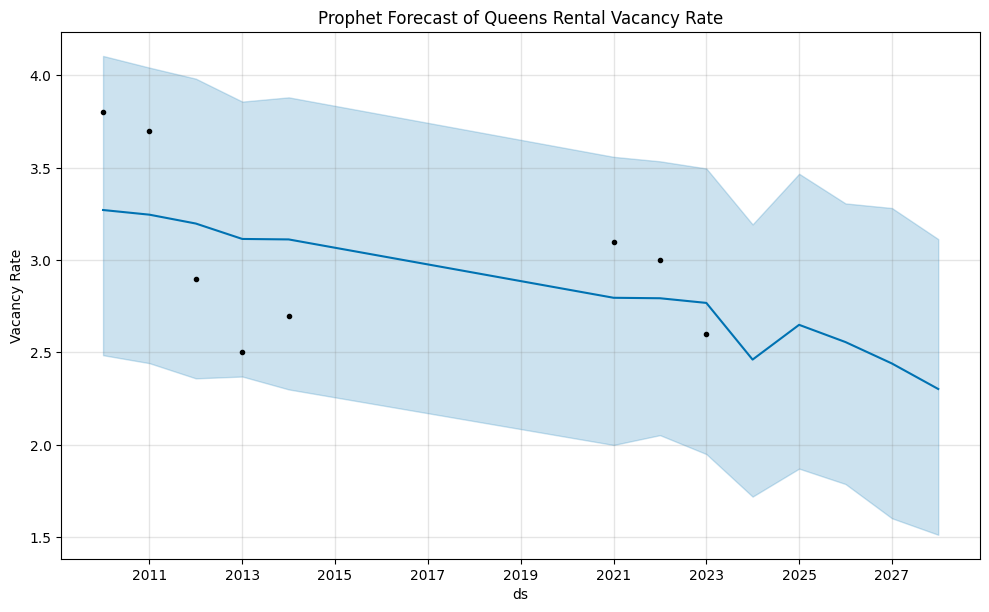

           ds      yhat  yhat_lower  yhat_upper
8  2023-12-31  2.461380    1.719371    3.193391
9  2024-12-31  2.649631    1.870894    3.467751
10 2025-12-31  2.556293    1.787484    3.307070
11 2026-12-31  2.440406    1.602190    3.282214
12 2027-12-31  2.302106    1.512675    3.113863


In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 2. Load & prepare your time series (e.g. rental vacancy rate)
df = pd.read_csv("Queens_Housing_2010_2023_Wide.csv")
df["Year"] = pd.to_datetime(df["Year"], format="%Y")

# Convert to Prophet’s expected columns: ds (date) & y (value)
ts = (
    df[["Year", "HOUSING OCCUPANCY - Rental vacancy rate"]]
      .rename(columns={"Year":"ds", "HOUSING OCCUPANCY - Rental vacancy rate":"y"})
)

# If the series is in “40.5%” format, strip % and convert to float
if ts["y"].dtype == object:
    ts["y"] = ts["y"].str.rstrip("%").astype(float) / 100

# 3. Fit the model
m = Prophet(yearly_seasonality=True, interval_width=0.95)
m.fit(ts)

# 4. Make a future dataframe (next 5 years)
future = m.make_future_dataframe(periods=5, freq="Y")

# 5. Forecast
forecast = m.predict(future)

# 6. Plot
fig = m.plot(forecast)
plt.title("Prophet Forecast of Queens Rental Vacancy Rate")
plt.ylabel("Vacancy Rate")
plt.show()

# 7. Inspect prediction intervals
print(forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail())


11:26:31 - cmdstanpy - INFO - Chain [1] start processing
11:26:31 - cmdstanpy - INFO - Chain [1] done processing


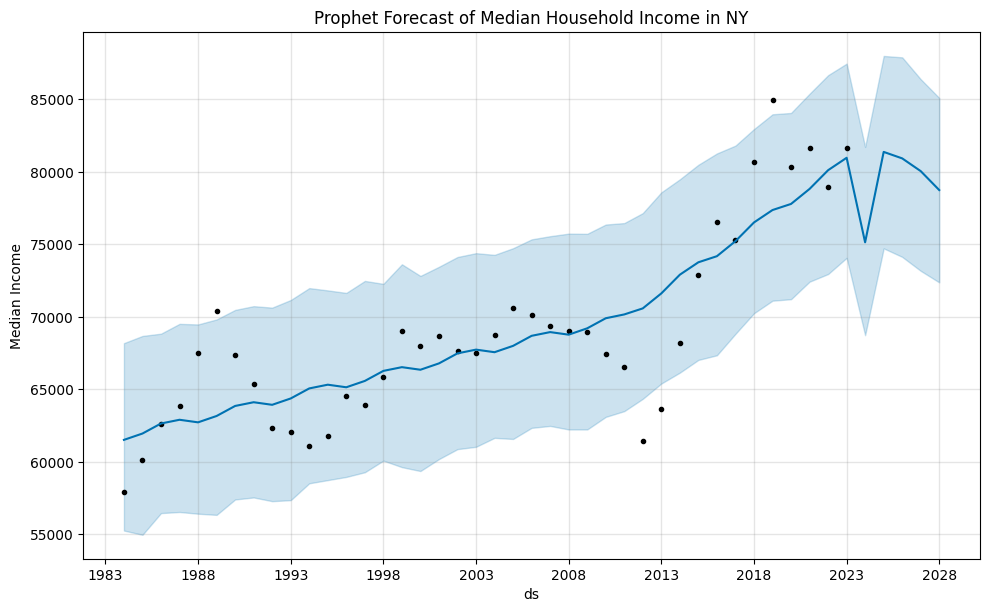

In [8]:
# Median Household Income NY analysis
df_income = pd.read_csv("MedianHouseholdIncome.csv")
df_income["observation_date"] = pd.to_datetime(df_income["observation_date"])
df_income = df_income.rename(columns={"observation_date": "ds", "MEHOINUSNYA672N": "y"})
m_income = Prophet(yearly_seasonality=True, interval_width=0.95)
m_income.fit(df_income)
future_income = m_income.make_future_dataframe(periods=5, freq="YE")
forecast_income = m_income.predict(future_income)
fig_income = m_income.plot(forecast_income)
plt.title("Prophet Forecast of Median Household Income in NY")
plt.ylabel("Median Income")
plt.show()
